# Análisis de Calidad de Vinos Tintos y Blancos

## Descarga de Datos

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

url_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

os.makedirs('../data/raw', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)

with open('../data/raw/winequality-red.csv', 'wb') as red:
    red.write(requests.get(url_red).content)
with open('../data/raw/winequality-white.csv', 'wb') as white:
    white.write(requests.get(url_white).content)

## Combinar los Datos

In [3]:

red_df = pd.read_csv('../data/raw/winequality-red.csv', sep=';')
white_df = pd.read_csv('../data/raw/winequality-white.csv', sep=';')

red_df['type'] = 'red'
white_df['type'] = 'white'

wines_df = pd.concat([red_df, white_df], ignore_index=True)
wines_df.to_csv('../data/processed/wines.csv', index=False)

### Conteo de Registros y Variables

In [4]:
print(wines_df.info())
print(wines_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
(6497, 13)


In [5]:
var_type = wines_df.dtypes.value_counts()
print(f'Observamos que tenemos {wines_df.shape[0]} registros, con {wines_df.isnull().sum().sum()} valores nulos y {wines_df.shape[1]} variables')
print(f'El tipo de variables es: \n\n{var_type}')


Observamos que tenemos 6497 registros, con 0 valores nulos y 13 variables
El tipo de variables es: 

float64    11
int64       1
object      1
Name: count, dtype: int64


## Filtrar Atípicos y Manejar Datos Ausentes

A continuación, realizaremos un estudio de los datos con el objetivo de obtener conclusiones sobre las variables que influyen en la obtención de un vino de alta calidad, en contraposición a aquellas que resultan en vinos de calidad inferior.

In [6]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Filtrar Datos Ausentes

In [7]:
# Crear una copia para filtrar valores atípicos y nulos
df_wines_copy = wines_df.copy()
df_wines_copy.columns = df_wines_copy.columns.str.replace(' ', '_')
df_wines_copy.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df_wines_copy['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [9]:
print(df_wines_copy.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [10]:
# df_wines_copy.dropna(inplace=True)

### Filtrar Valores Atípicos

In [11]:
# Lista de columnas numéricas a analizar (en este caso todas las que aparecen en describe)
columnas_numericas = df_wines_copy.select_dtypes(include=['float64', 'int64']).columns

In [12]:
# Calcular la matriz de correlación para todos los tipos de vinos
corr_matrix = df_wines_copy[columnas_numericas].corr()

In [13]:
# Calcular la matriz de correlación para todos los vinos blancos

corr_matrix_white = df_wines_copy[df_wines_copy['type'] == 'white'][columnas_numericas].corr()

In [14]:
# Calcular la matriz de correlación para todos los vinos tintos

corr_matrix_red = df_wines_copy[df_wines_copy['type'] == 'red'][columnas_numericas].corr()

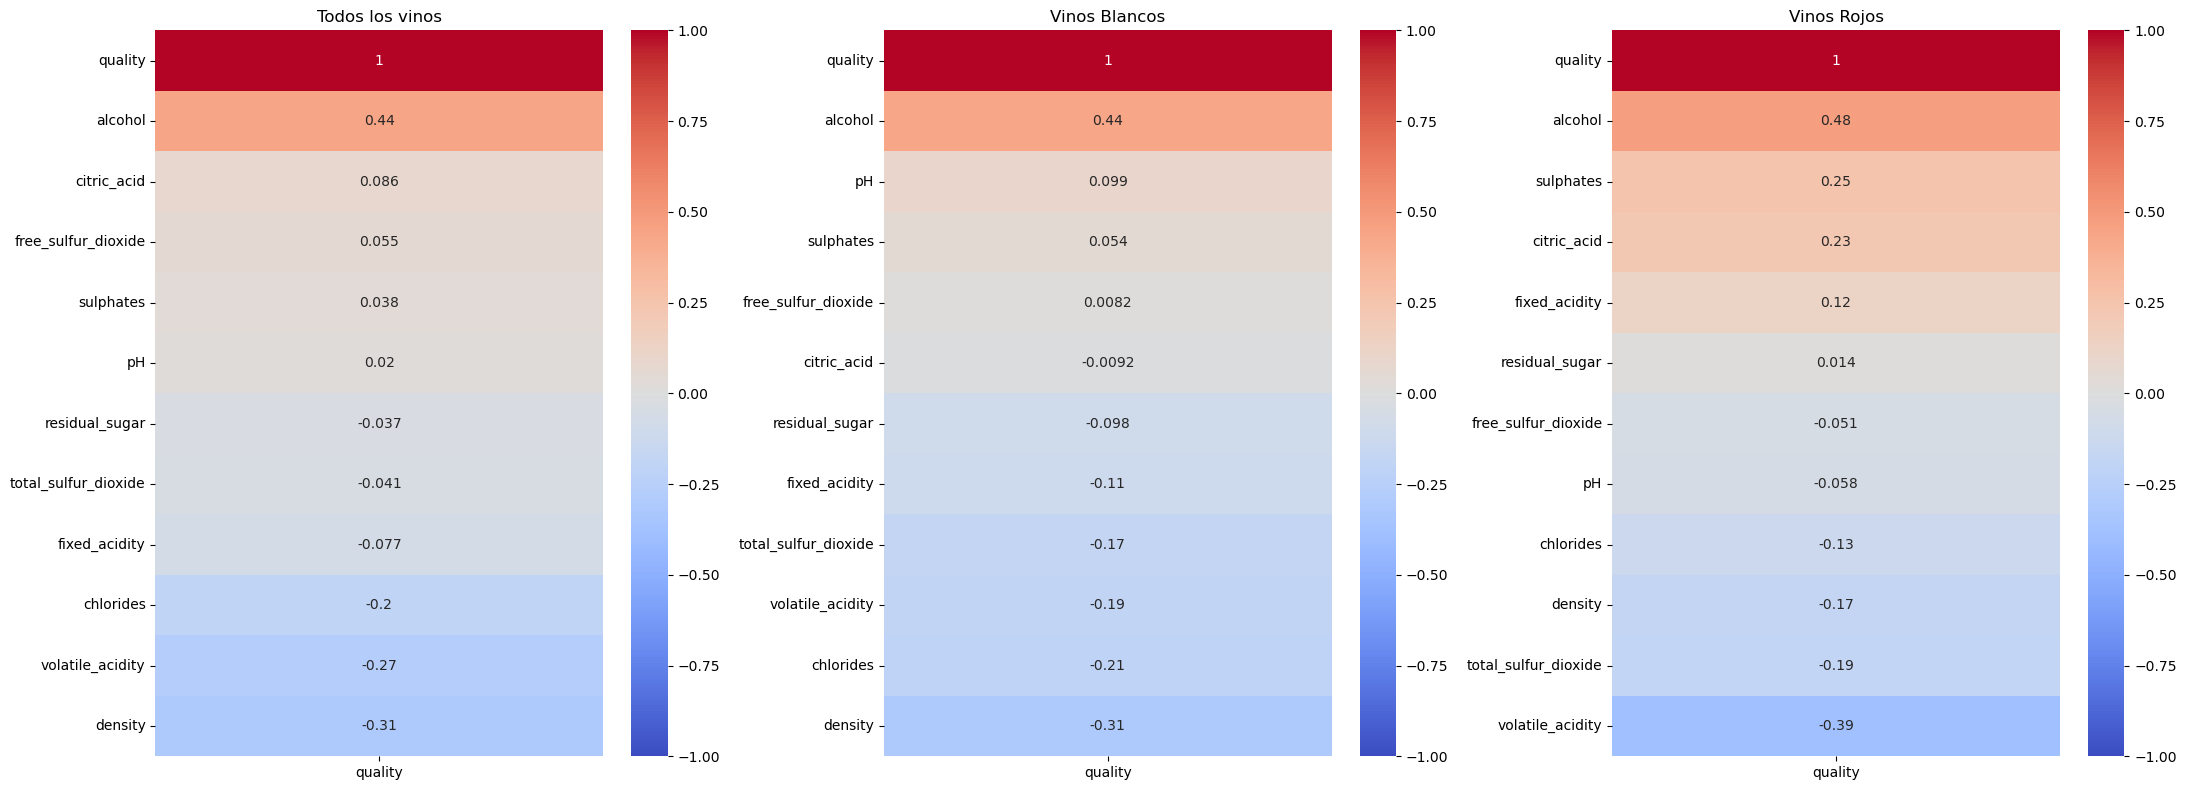

In [15]:
# Visualizar la correlación entre cada variable y la calidad del vino entre todos los vinos, rojos y blancos

fig, axes = plt.subplots(1, 3, figsize=(22, 8))

sns.heatmap(corr_matrix[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Todos los vinos')

sns.heatmap(corr_matrix_white[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Vinos Blancos')

sns.heatmap(corr_matrix_red[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[2])
axes[2].set_title('Vinos Rojos')

plt.tight_layout()
plt.show()


## Definir un umbral para las correlaciones negativas e Identificacion de las variables que afectan negativamente a la calidad del vino por separado.

In [16]:
# Definir un umbral para las correlaciones negativas
correlation_threshold = -0.1  # Por ejemplo, -0.1

In [17]:
# Identificar las variables que afectan negativamente a la calidad del vino tinto
negative_corr_vars_red = corr_matrix_red['quality'][corr_matrix_red['quality'] < correlation_threshold].index.tolist()
print("Variables que afectan negativamente a la calidad del vino tinto:", negative_corr_vars_red)

# Identificar las variables que afectan negativamente a la calidad del vino blanco
negative_corr_vars_white = corr_matrix_white['quality'][corr_matrix_white['quality'] < correlation_threshold].index.tolist()
print("Variables que afectan negativamente a la calidad del vino blanco:", negative_corr_vars_white)

Variables que afectan negativamente a la calidad del vino tinto: ['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'density']
Variables que afectan negativamente a la calidad del vino blanco: ['fixed_acidity', 'volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'density']


## Funicon para filtrar los atipicos solo de las variables identificadas.

In [18]:
def remove_negative_outliers_iqr(df, negative_vars):
    df_filtered = df.copy()
    for column in negative_vars:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    return df_filtered

In [19]:
# Separar los DataFrames por tipo de vino
df_red = df_wines_copy[df_wines_copy['type'] == 'red'].copy()
df_white = df_wines_copy[df_wines_copy['type'] == 'white'].copy()

# Aplicar la función de filtrado a los DataFrames de vinos tintos y blancos
df_red_filtered = remove_negative_outliers_iqr(df_red, negative_corr_vars_red)
df_white_filtered = remove_negative_outliers_iqr(df_white, negative_corr_vars_white)

In [20]:
# Realizamos un concatenado de los dos dataframes filtrados

df_wines_filtered = pd.concat([df_red_filtered, df_white_filtered], ignore_index=True)

In [21]:
print("Descripción del DataFrame original:")
display(df_wines_copy.describe())

print("\nDescripción del DataFrame filtrado:")
display(df_wines_filtered.describe())

Descripción del DataFrame original:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000



Descripción del DataFrame filtrado:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000
mean,7.163971,0.325676,0.315906,5.482560,0.051123,30.687004,115.037021,0.994615,3.223029,0.527884,10.519382,5.868657
std,1.218262,0.151971,0.137875,4.692735,0.019153,17.252842,55.702516,0.002920,0.157819,0.136256,1.176088,0.852799
min,4.600000,0.080000,0.000000,0.600000,0.015000,1.000000,6.000000,0.987110,2.790000,0.220000,8.400000,3.000000
25%,6.400000,0.220000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.280000,0.310000,3.000000,0.046000,29.000000,117.000000,0.994800,3.210000,0.510000,10.400000,6.000000
75%,7.600000,0.380000,0.390000,8.200000,0.060000,42.000000,155.000000,0.996910,3.330000,0.600000,11.300000,6.000000
max,15.900000,1.005000,1.660000,23.500000,0.119000,128.000000,255.000000,1.002410,4.010000,1.560000,14.900000,9.000000


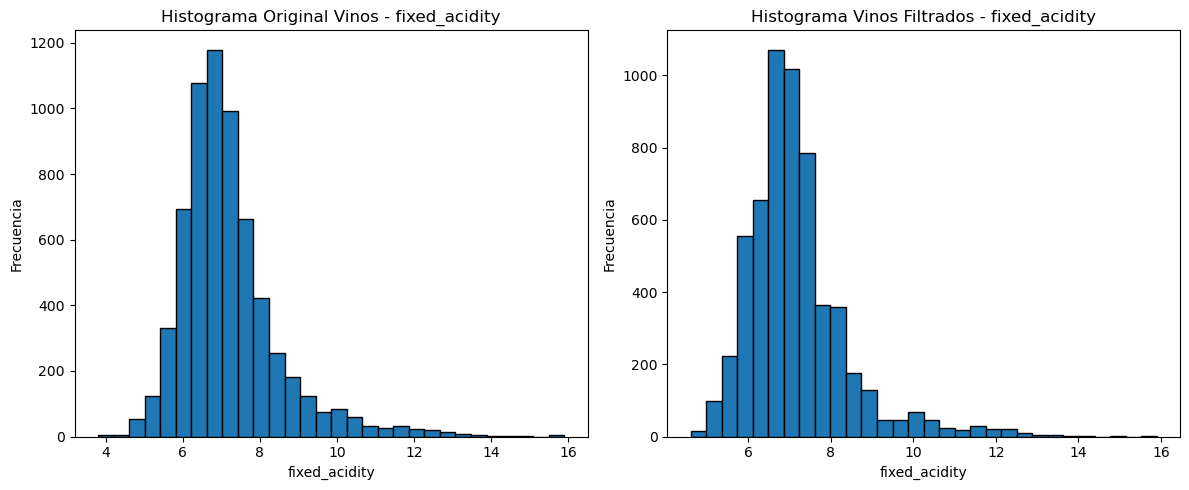

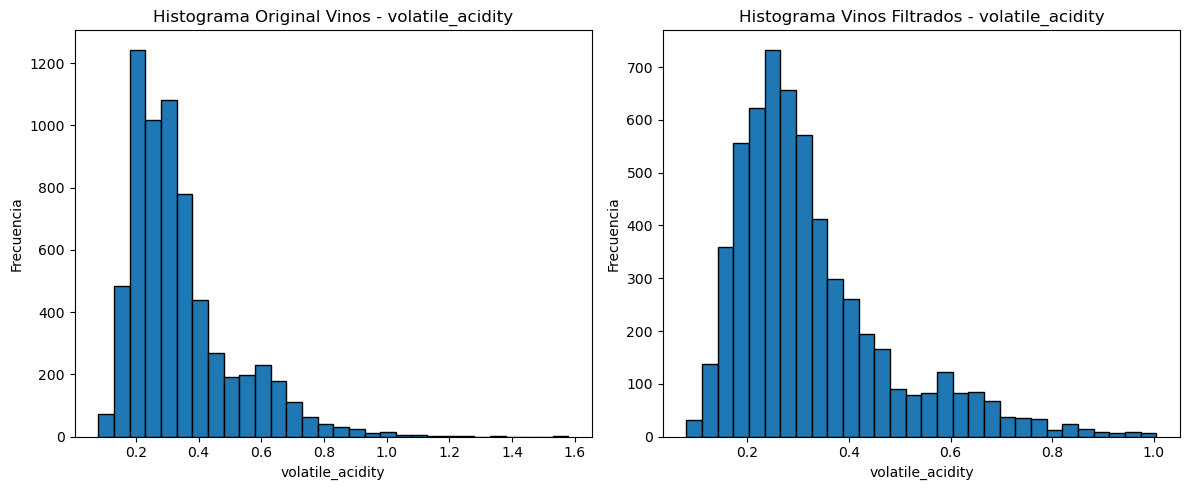

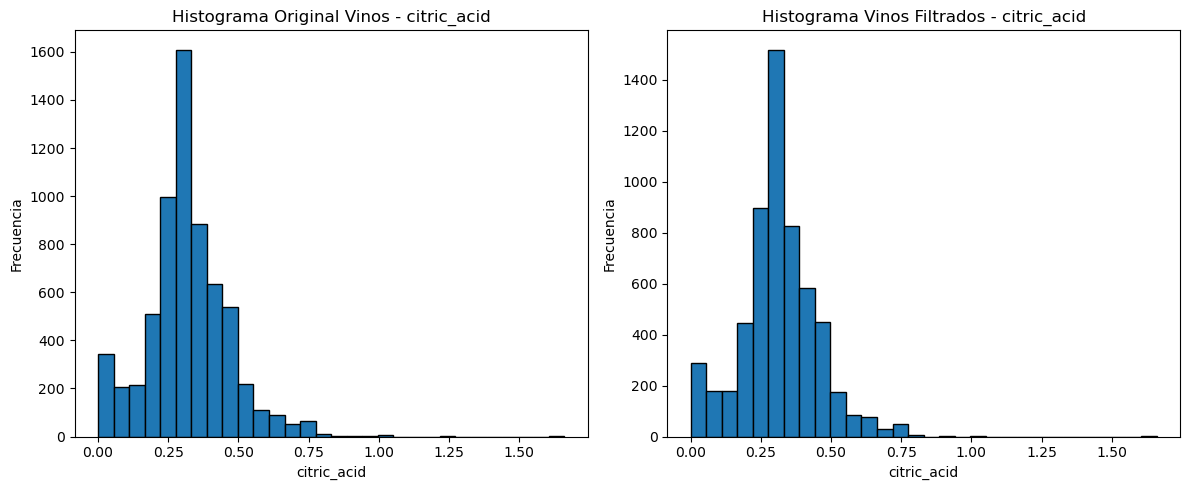

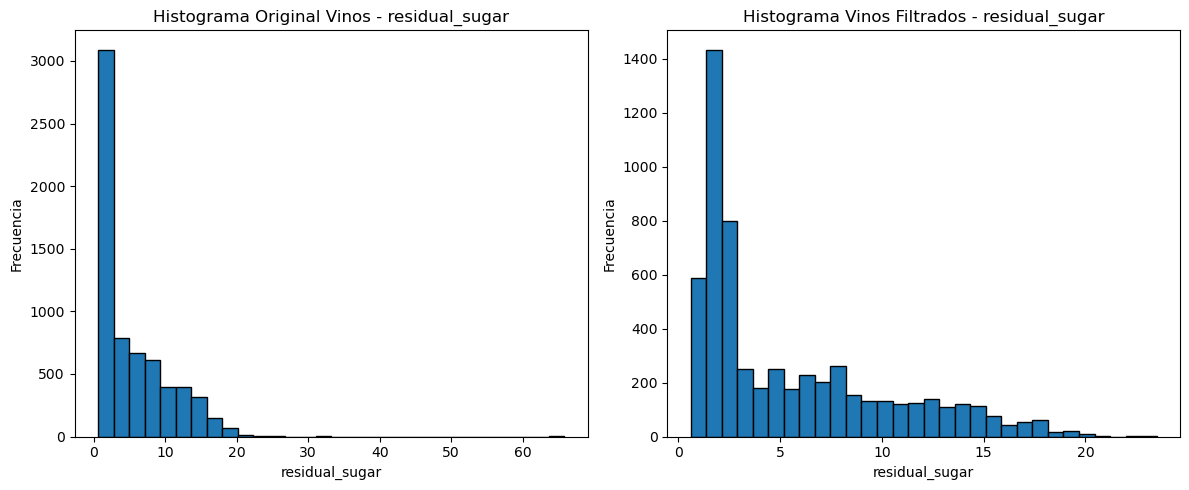

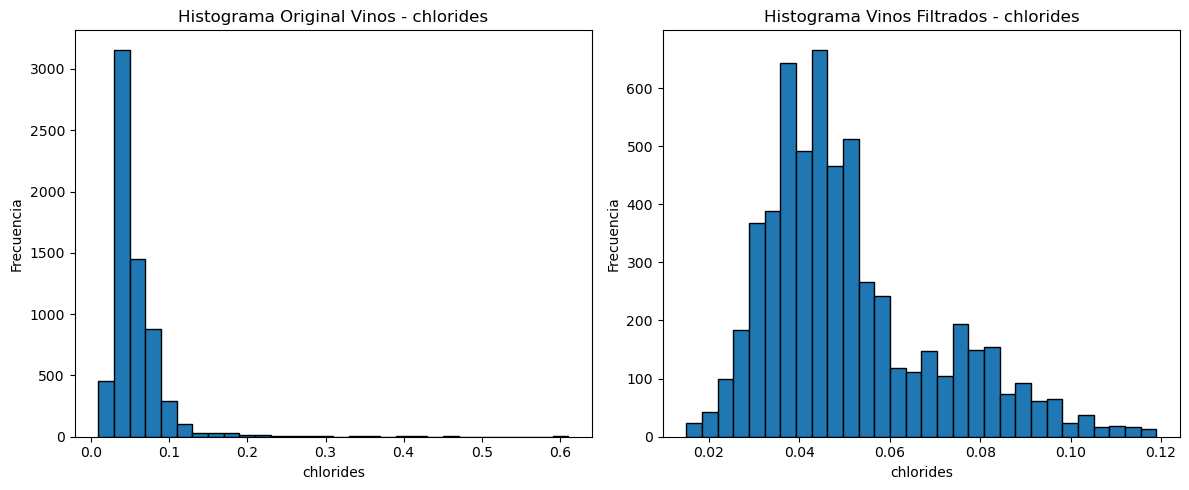

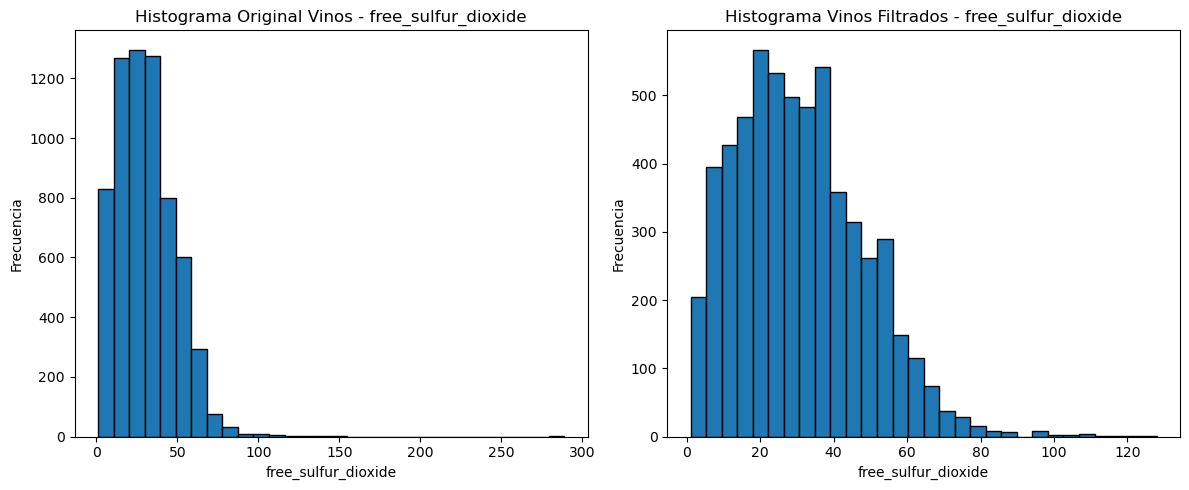

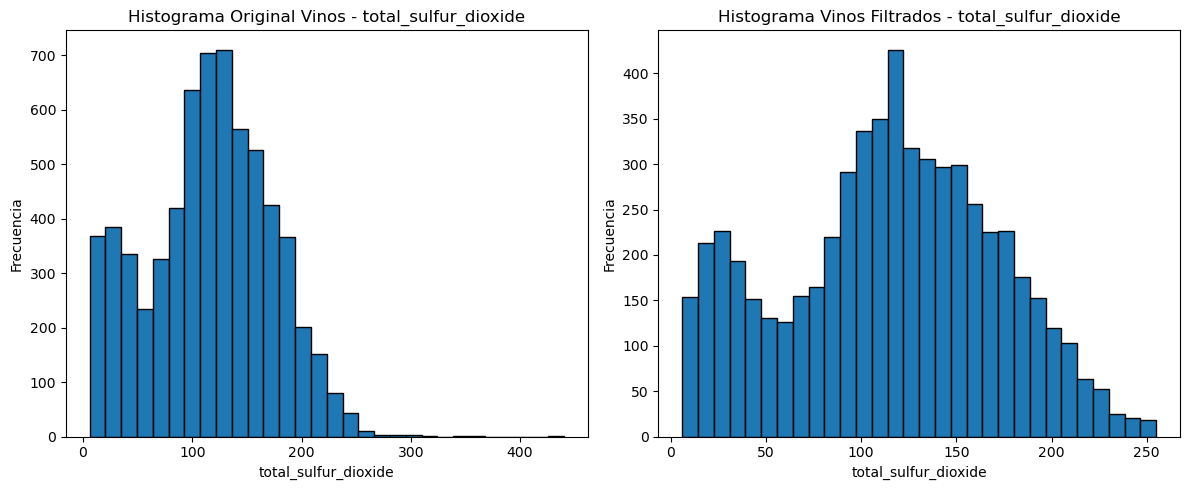

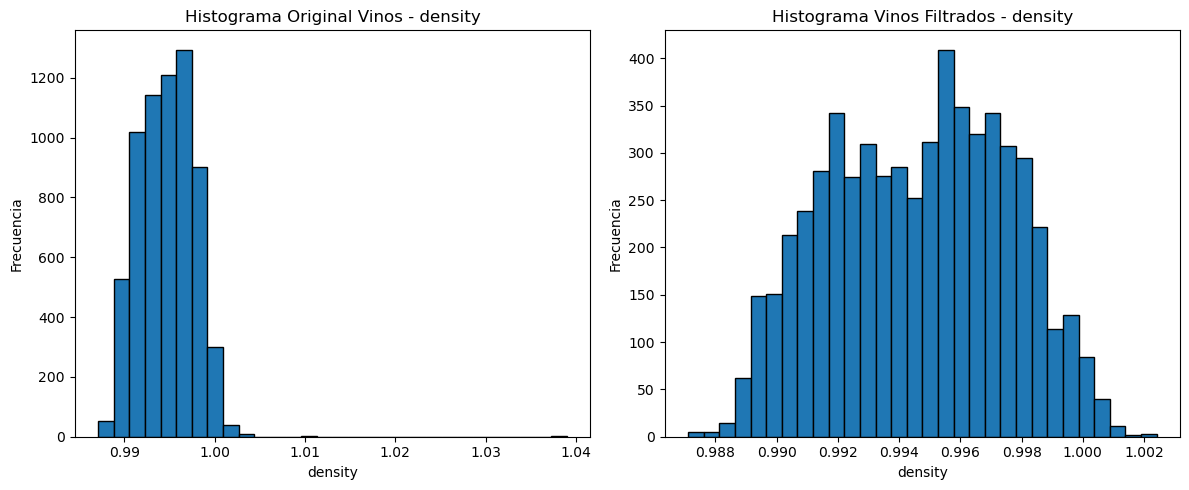

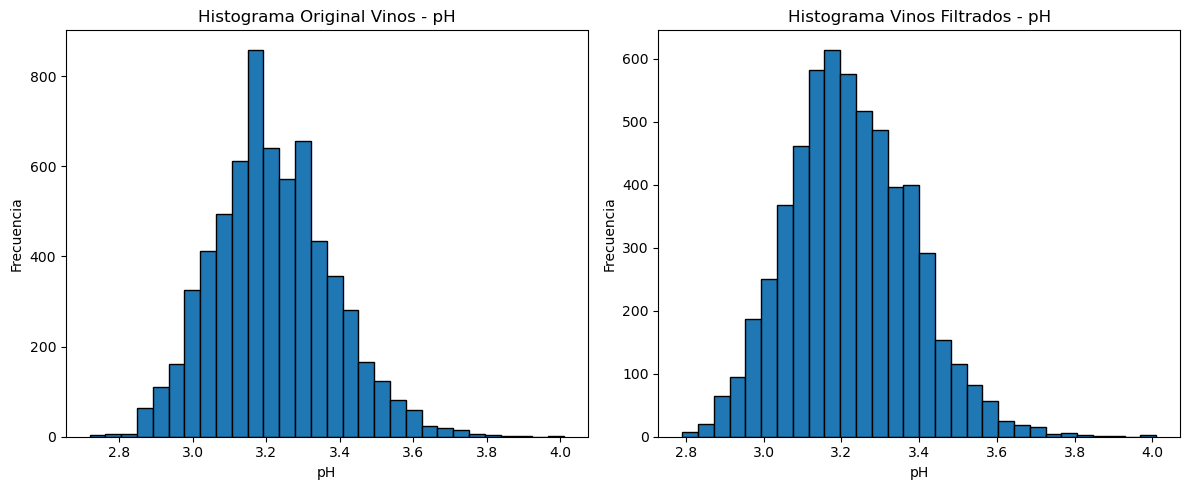

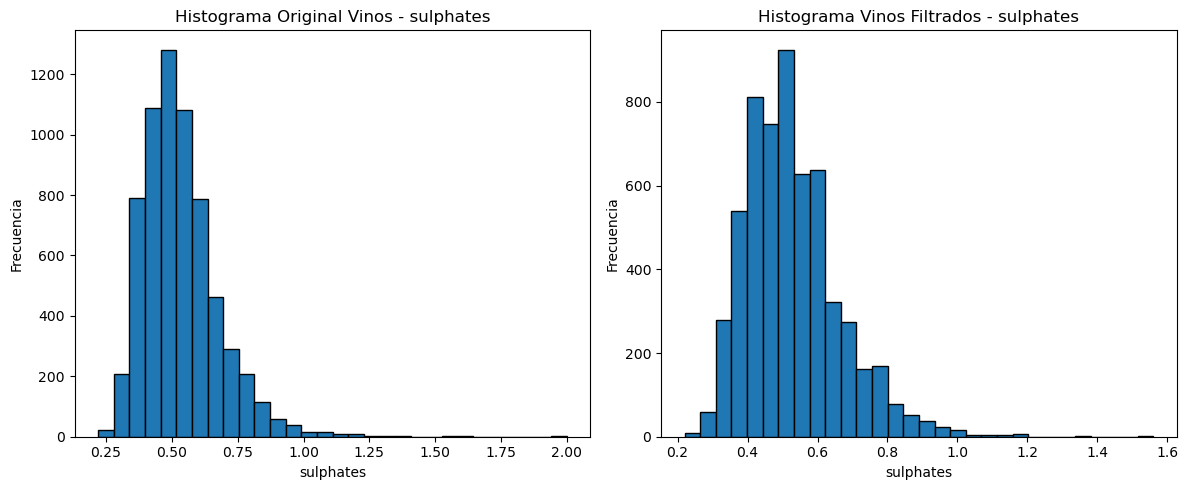

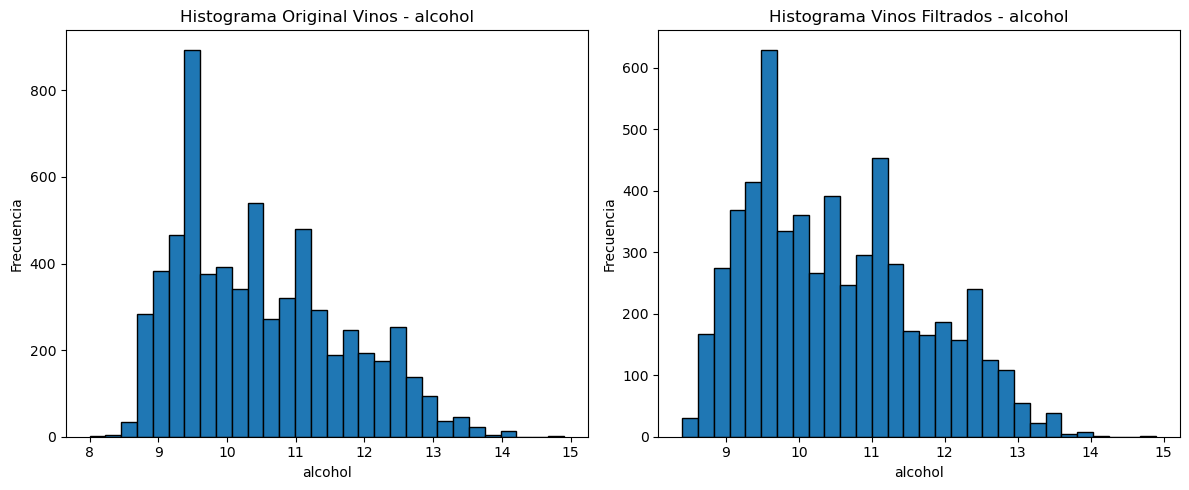

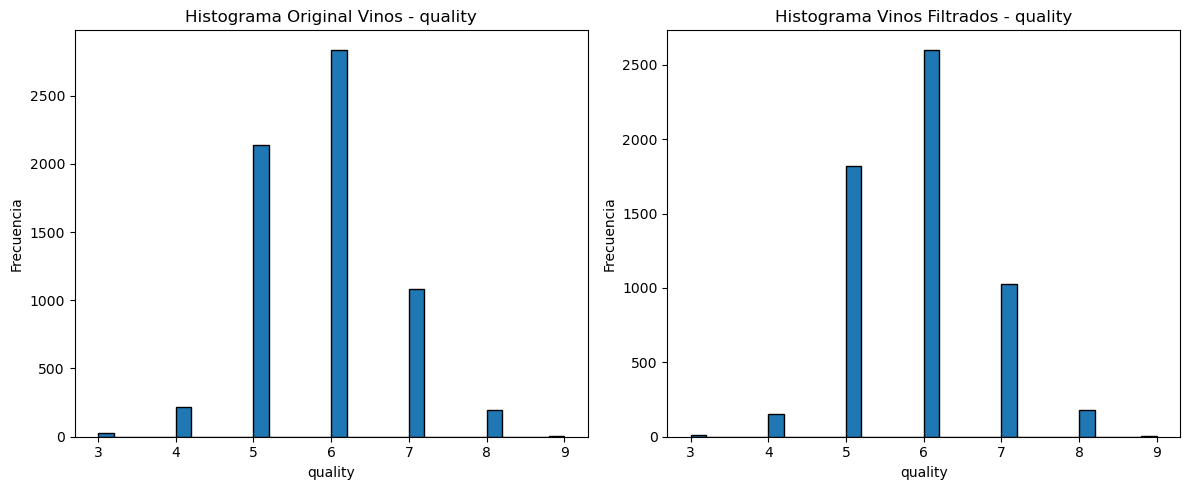

In [22]:
# Comparación de histogramas entre el DataFrame original y el filtrado

for col in columnas_numericas:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df_wines_copy[col], bins=30, edgecolor='black')
    plt.title(f'Histograma Original Vinos - {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    plt.subplot(1, 2, 2)
    plt.hist(df_wines_filtered[col], bins=30, edgecolor='black')
    plt.title(f'Histograma Vinos Filtrados - {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()


## Almacenar los Datos Limpios en SQLite

In [23]:
import sqlite3

conn = sqlite3.connect('../data/processed/wine_quality.db')
df_wines_filtered.to_sql('wine_quality', conn, if_exists='replace', index=False)
conn.close()

## Realizar 3 Consultas en SQLite

In [24]:
conn = sqlite3.connect('../data/processed/wine_quality.db')

query1 = "SELECT type, AVG(quality) FROM wine_quality GROUP BY type"
query2 = "SELECT type, COUNT(*) FROM wine_quality WHERE alcohol >= 10.5 GROUP BY type"
query3 = """
SELECT CASE 
         WHEN fixed_acidity BETWEEN 0 AND 5 THEN '0-5'
         WHEN fixed_acidity > 5 AND fixed_acidity <= 10 THEN '5-10'
         WHEN fixed_acidity > 10 AND fixed_acidity <= 15 THEN '10-15'
         ELSE '15+' 
       END AS acidity_range,
       COUNT(*) AS count
FROM wine_quality
GROUP BY acidity_range
ORDER BY count DESC
"""

result1 = pd.read_sql_query(query1, conn)
result2 = pd.read_sql_query(query2, conn)
result3 = pd.read_sql_query(query3, conn)

conn.close()

result1, result2, result3

(    type  AVG(quality)
 0    red      5.663067
 1  white      5.933485,
     type  COUNT(*)
 0    red       599
 1  white      2172,
   acidity_range  count
 0          5-10   5548
 1         10-15    207
 2           0-5     38
 3           15+      1)

## Exportar Datos a JSONLines

In [25]:
import jsonlines

result1.to_json('../data/processed/result1.jsonl', orient='records', lines=True)
result2.to_json('../data/processed/result2.jsonl', orient='records', lines=True)
result3.to_json('../data/processed/result3.jsonl', orient='records', lines=True)

### Explorar Problemas Potenciales al Transformar un DataFrame en JSONLines

In [26]:
df_wines_filtered['np_array_column'] = ([np.random.rand(5) for _ in range(len(df_wines_filtered))])
# No es posible convertir una lista de listas en un array de numpy directamente
# ya que obtenemos el siguiente error: ValueError: setting an array element with a sequence.
df_wines_filtered.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,np_array_column
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.9934015606789778, 0.1427577328274151, 0.286..."
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,"[0.6618398238883431, 0.05227385123253636, 0.86..."
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,"[0.36678022768922447, 0.37955976209953657, 0.1..."
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,"[0.34055212659084244, 0.9578086159872387, 0.73..."
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.2588153943628322, 0.314423610874738, 0.3108..."


In [27]:
df_wines_filtered['np_array_column'] = [np.random.rand(5) for _ in range(len(df_wines_filtered))]
df_wines_filtered.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,np_array_column
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.2928565567407758, 0.017324782946058326, 0.9..."
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,"[0.0590601416870461, 0.14779108792349072, 0.97..."
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,"[0.8657244860140841, 0.4875824776893347, 0.312..."
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,"[0.4410699465664982, 0.1835407621300228, 0.065..."
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.6523487310827889, 0.21738001580054533, 0.04..."


In [28]:
df_wines_filtered['datetime_column'] = pd.to_datetime('now')
df_wines_filtered.sample(6)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,np_array_column,datetime_column
2975,7.4,0.350,0.31,17.95,0.062,42.0,187.0,1.0002,3.27,0.64,9.1,5,white,"[0.1681008556977276, 0.5923560951140009, 0.998...",2025-02-20 21:09:33.998161
702,7.1,0.685,0.35,2.00,0.088,9.0,92.0,0.9963,3.28,0.62,9.4,5,red,"[0.019610706798715016, 0.8174154793164315, 0.4...",2025-02-20 21:09:33.998161
3208,7.6,0.290,0.29,4.40,0.051,26.0,146.0,0.9939,3.16,0.39,10.2,5,white,"[0.37934606165403084, 0.6192210479087136, 0.09...",2025-02-20 21:09:33.998161
2001,6.4,0.320,0.50,10.70,0.047,57.0,206.0,0.9968,3.08,0.60,9.4,5,white,"[0.8356338736986867, 0.48923604282910116, 0.81...",2025-02-20 21:09:33.998161
685,6.7,0.540,0.13,2.00,0.076,15.0,36.0,0.9973,3.61,0.64,9.8,5,red,"[0.17436361770288367, 0.08286994408748338, 0.8...",2025-02-20 21:09:33.998161
2176,6.1,0.270,0.33,2.20,0.021,26.0,117.0,0.9886,3.12,0.30,12.5,6,white,"[0.2481816407296924, 0.3860044819977162, 0.883...",2025-02-20 21:09:33.998161


In [29]:
try:
    json_lines = df_wines_filtered.to_json('../data/processed/combined_wine_with_arrays.jsonl', orient='records', lines=True)
    print(json_lines)
except Exception as e:
    print(f"Error: {e}")

None


In [30]:
df_from_json = pd.read_json('../data/processed/combined_wine_with_arrays.jsonl', lines=True)
df_from_json.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,np_array_column,datetime_column
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.2928565567, 0.017324782900000002, 0.9121302...",1740085773998
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,"[0.0590601417, 0.1477910879, 0.9792997218, 0.0...",1740085773998
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,"[0.8657244860000001, 0.4875824777, 0.312329902...",1740085773998
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,"[0.44106994660000004, 0.1835407621, 0.06505851...",1740085773998
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.6523487311, 0.21738001580000002, 0.04658821...",1740085773998


In [31]:
df_from_json['datetime_column'] = pd.to_datetime(df_from_json['datetime_column'], unit='ms') # 's' for seconds, 'ms' for milliseconds
df_from_json.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,np_array_column,datetime_column
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.2928565567, 0.017324782900000002, 0.9121302...",2025-02-20 21:09:33.998
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,"[0.0590601417, 0.1477910879, 0.9792997218, 0.0...",2025-02-20 21:09:33.998
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,"[0.8657244860000001, 0.4875824777, 0.312329902...",2025-02-20 21:09:33.998
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,"[0.44106994660000004, 0.1835407621, 0.06505851...",2025-02-20 21:09:33.998
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,"[0.6523487311, 0.21738001580000002, 0.04658821...",2025-02-20 21:09:33.998


## Análisis de Calidad de los Vinos

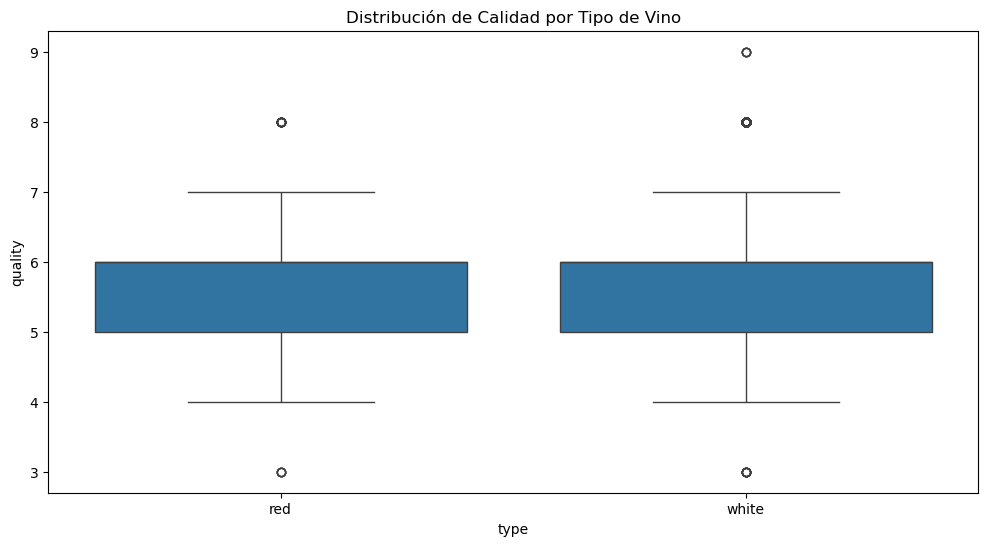

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='quality', data=df_wines_filtered)
plt.title('Distribución de Calidad por Tipo de Vino')
plt.show()

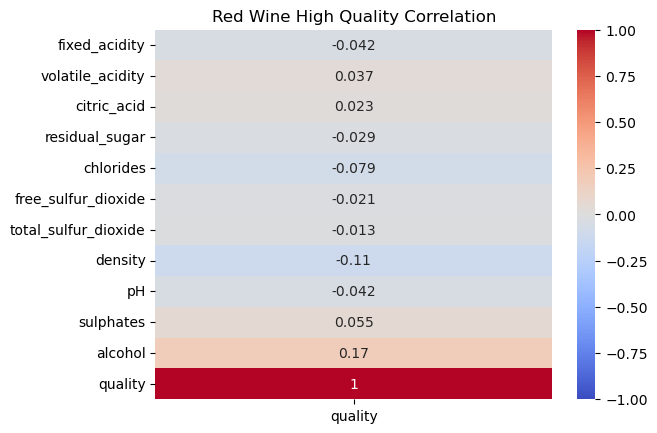

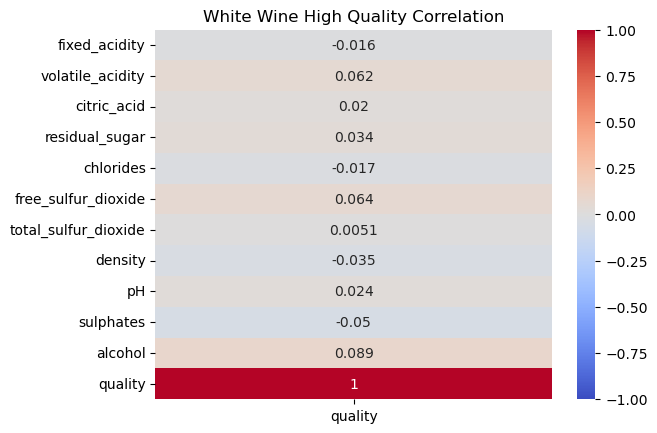

In [33]:
# Example code snippet
red_high_quality = df_red[df_red['quality'] >= 7].drop(columns='type')
white_high_quality = df_white[df_white['quality'] >= 7].drop(columns='type')

red_corr = red_high_quality.corr()
white_corr = white_high_quality.corr()

sns.heatmap(red_corr[['quality']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Red Wine High Quality Correlation")
plt.show()

sns.heatmap(white_corr[['quality']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("White Wine High Quality Correlation")
plt.show()

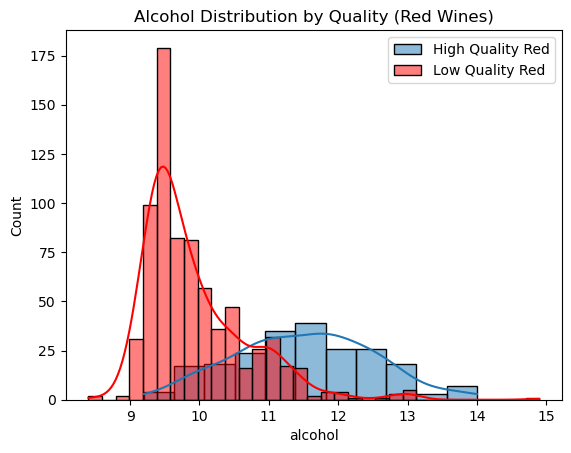

In [34]:
# Example code snippet
sns.histplot(df_red[df_red['quality'] >= 7]['alcohol'], kde=True, label='High Quality Red')
sns.histplot(df_red[df_red['quality'] <= 5]['alcohol'], kde=True, color='red', label='Low Quality Red')
plt.legend()
plt.title("Alcohol Distribution by Quality (Red Wines)")
plt.show()

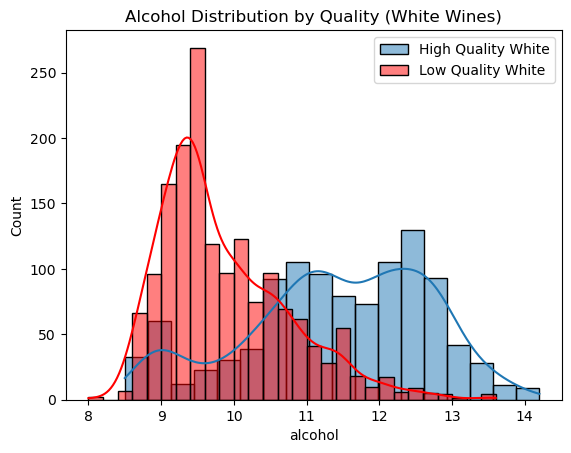

In [35]:
# Example code snippet
sns.histplot(df_white[df_white['quality'] >= 7]['alcohol'], kde=True, label='High Quality White')
sns.histplot(df_white[df_white['quality'] <= 5]['alcohol'], kde=True, color='red', label='Low Quality White')
plt.legend()
plt.title("Alcohol Distribution by Quality (White Wines)")
plt.show()

In [36]:
# Example code snippet
display("High Quality Red Wine Stats:\n", df_red[df_red['quality'] >= 7].describe())
display("\nHigh Quality White Wine Stats:\n", df_white[df_white['quality'] >= 7].describe())

'High Quality Red Wine Stats:\n'

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000


'\nHigh Quality White Wine Stats:\n'

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528
std,0.768798,0.094097,0.080288,4.290845,0.011145,13.797146,32.724848,0.002772,0.157185,0.133044,1.255209,0.391978
min,3.900000,0.080000,0.010000,0.800000,0.012000,5.000000,34.000000,0.987110,2.840000,0.220000,8.500000,7.000000
25%,6.200000,0.190000,0.280000,1.800000,0.031000,25.000000,101.000000,0.990500,3.100000,0.400000,10.700000,7.000000
50%,6.700000,0.250000,0.310000,3.875000,0.037000,33.000000,122.000000,0.991730,3.200000,0.480000,11.500000,7.000000
75%,7.200000,0.320000,0.360000,7.400000,0.044000,42.000000,146.000000,0.993605,3.320000,0.580000,12.400000,7.000000
max,9.200000,0.760000,0.740000,19.250000,0.135000,108.000000,229.000000,1.000600,3.820000,1.080000,14.200000,9.000000


In [37]:
# Create normalized copies of df_red and df_white using min–max scaling

# For red wines
num_cols_red = df_red.select_dtypes(include=[np.number]).columns.tolist()
if 'quality' in num_cols_red:
    num_cols_red.remove('quality')

df_red_normalized = df_red.copy()
df_red_normalized[num_cols_red] = df_red_normalized[num_cols_red].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# For white wines
num_cols_white = df_white.select_dtypes(include=[np.number]).columns.tolist()
if 'quality' in num_cols_white:
    num_cols_white.remove('quality')

df_white_normalized = df_white.copy()
df_white_normalized[num_cols_white] = df_white_normalized[num_cols_white].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

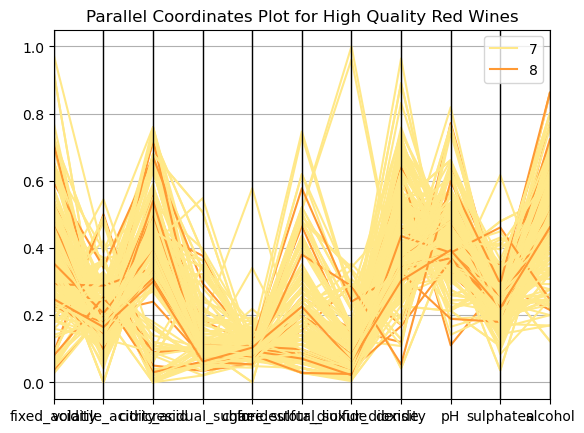

In [38]:
# Example code snippet (requires more setup for normalization and plotting)
from pandas.plotting import parallel_coordinates

# Assuming df_red_normalized and df_white_normalized are created
parallel_coordinates(df_red_normalized[df_red_normalized['quality'] >= 7].drop(columns='type'), class_column='quality', color=('#FFE888', '#FF9933', '#4C4C4C'))
plt.title("Parallel Coordinates Plot for High Quality Red Wines")
plt.show()

In [41]:
df_wines_copy.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


### Análisis Estadístico

In [42]:
df_wines_filtered.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1389.0,5.663067,0.794576,3.0,5.0,6.0,6.0,8.0
white,4405.0,5.933485,0.860305,3.0,5.0,6.0,6.0,9.0
